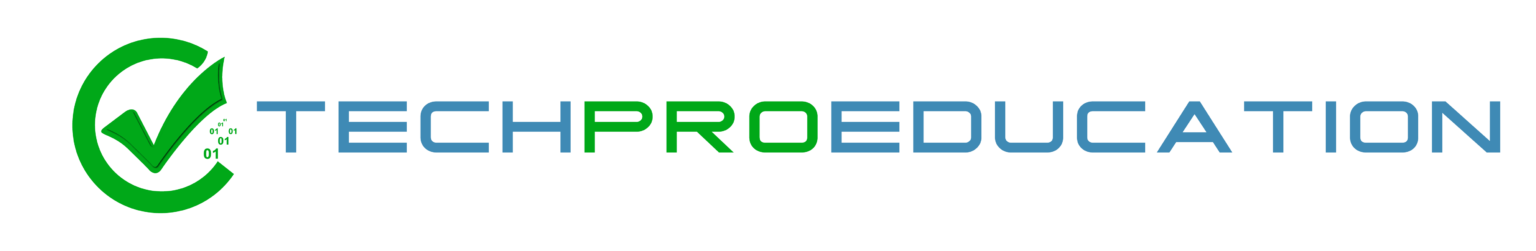

# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

# Exploratory Data Analysis and Visualization

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

plt.rcParams["figure.figsize"]=(10,6)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: '%.2f'  %x)

pd.options.display.max_rows=50
pd.options.display.max_columns=100

import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")

In [2]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df["income"] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [6]:
df.income.unique()

array([0, 1])

In [7]:
df.sample(20)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
22974,18,Private,192485,12th,8,Never-married,Handlers-cleaners,Own-child,Black,Male,0,0,20,United-States,0
28548,33,?,202366,HS-grad,9,Divorced,?,Unmarried,White,Female,0,0,32,United-States,0
24132,24,Private,67804,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,40,United-States,0
18574,59,Private,205759,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,0
27282,45,Private,128378,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,0
12026,61,Private,215944,9th,5,Divorced,Sales,Not-in-family,White,Male,0,0,25,United-States,0
19642,32,Self-emp-not-inc,115066,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
29410,46,Private,268022,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,?,1
32491,28,Private,113987,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,0
32459,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,1


In [8]:
df.workclass.value_counts(ascending=False)

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [9]:
df.isin(["?"]).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [10]:
df.workclass.replace("?", "Unknown", inplace=True)

In [11]:
df.occupation.replace("?", "Unknown", inplace=True)

In [12]:
df["native.country"].replace("?","Unknown", inplace=True)

In [13]:
df.isin(["?"]).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


In [137]:
df.workclass.nunique()

9

In [138]:
df.groupby("education")["education.num"].value_counts(dropna=False)

education     education.num
10th          6                  933
11th          7                 1175
12th          8                  433
1st-4th       2                  168
5th-6th       3                  333
7th-8th       4                  646
9th           5                  514
Assoc-acdm    12                1067
Assoc-voc     11                1382
Bachelors     13                5355
Doctorate     16                 413
HS-grad       9                10501
Masters       14                1723
Preschool     1                   51
Prof-school   15                 576
Some-college  10                7291
Name: count, dtype: int64

In [139]:
df.education.nunique()

16

In [140]:
df.income.value_counts(normalize=True)

income
0   0.76
1   0.24
Name: proportion, dtype: float64

In [141]:
df.income.value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

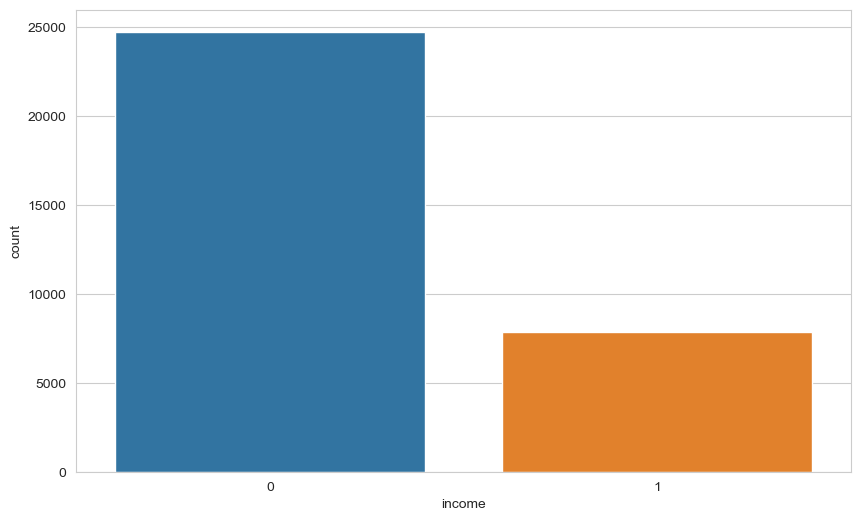

In [142]:
sns.countplot(data=df, x="income");

**unbalance olabilir**

In [143]:
df_numeric = df.select_dtypes(include="number")

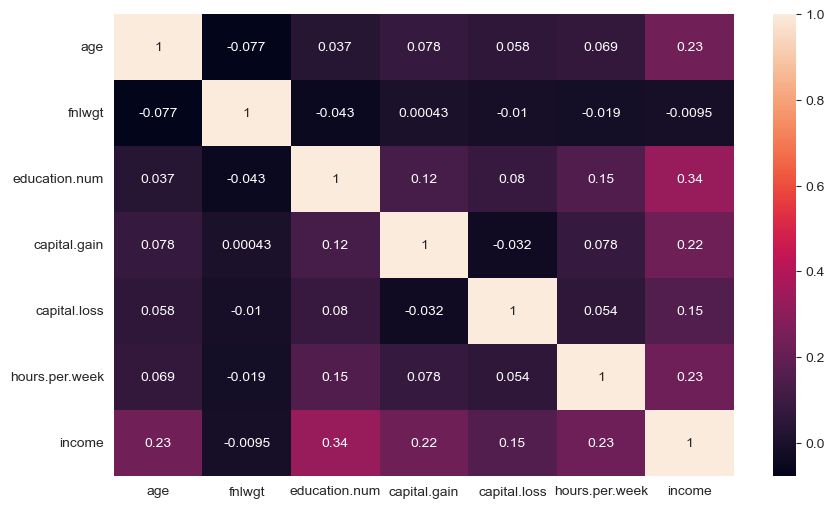

In [144]:
sns.heatmap(df_numeric.corr(), annot=True);

In [145]:
df_numeric.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.00,-0.08,0.04,0.08,0.06,0.07,0.23
fnlwgt,-0.08,1.00,-0.04,0.00,-0.01,-0.02,-0.01
education.num,0.04,-0.04,1.00,0.12,0.08,0.15,0.34
capital.gain,0.08,0.00,0.12,1.00,-0.03,0.08,0.22
capital.loss,0.06,-0.01,0.08,-0.03,1.00,0.05,0.15
hours.per.week,0.07,-0.02,0.15,0.08,0.05,1.00,0.23
income,0.23,-0.01,0.34,0.22,0.15,0.23,1.00


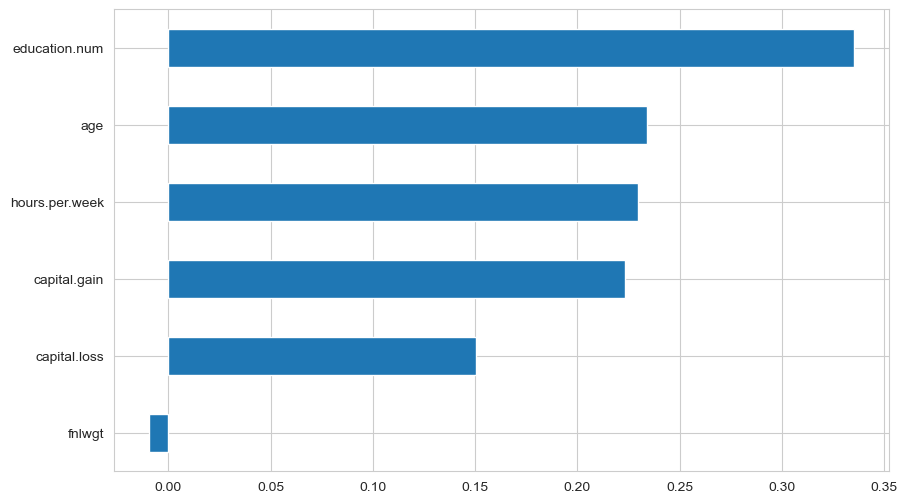

In [146]:
df_numeric.corr()["income"].drop("income").sort_values().plot.barh();

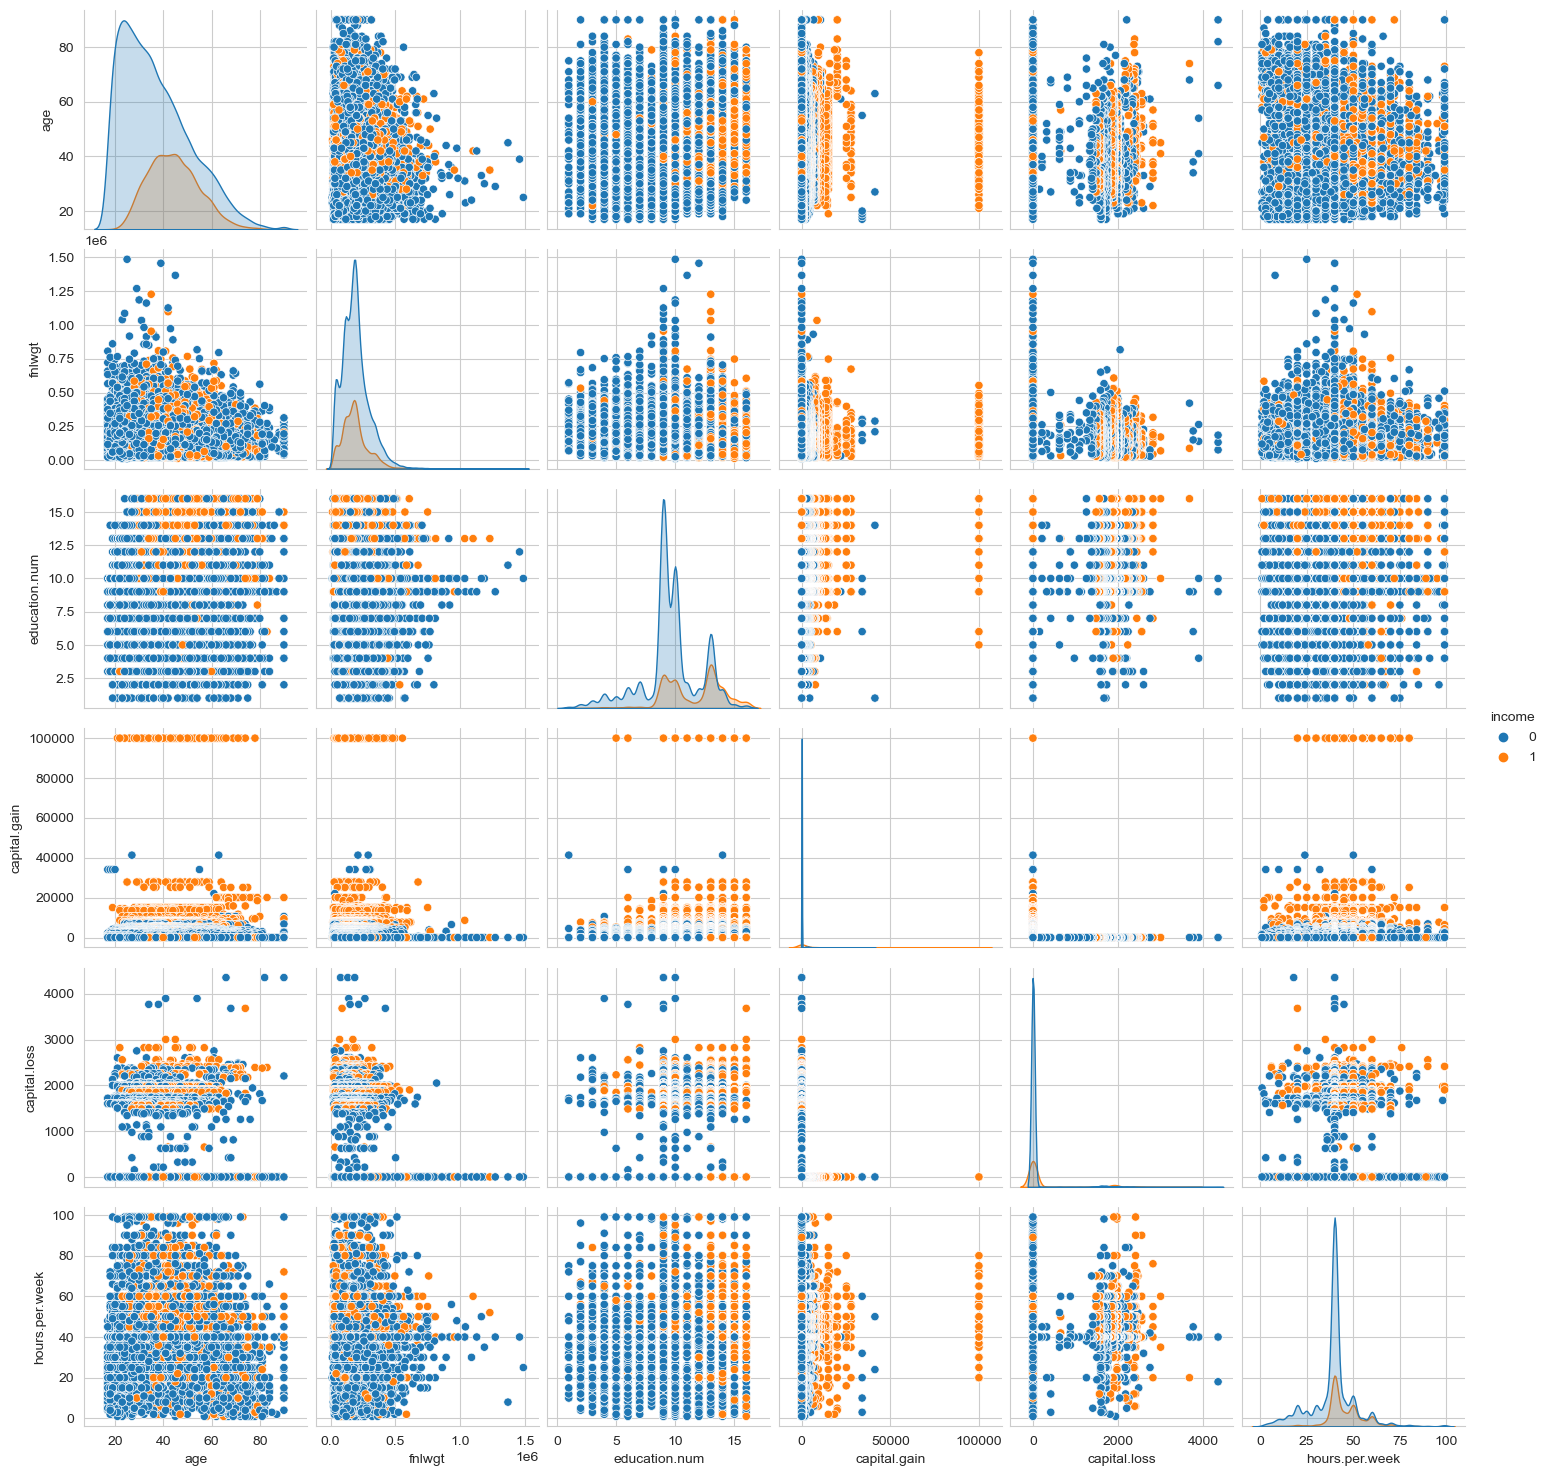

In [147]:
sns.pairplot(df, hue = "income");

In [148]:
# index = 0
# plt.figure(figsize=(20,20))
# for feature in df_numeric.columns:
#     if feature != "income":
#         index += 1
#         plt.subplot(3,3,index)
#         sns.boxplot(x='income',y=feature,data=df_numeric)
# plt.show()

In [149]:
df.drop("education.num", axis= 1, inplace = True)

In [150]:
df.education.unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [151]:
df.education=df.education.str.replace("Preschool", "0").str.replace("5th-6th","1").str.replace("7th-8th","2")

In [152]:
df.education

0             HS-grad
1             HS-grad
2        Some-college
3                   2
4        Some-college
             ...     
32556    Some-college
32557      Assoc-acdm
32558         HS-grad
32559         HS-grad
32560         HS-grad
Name: education, Length: 32561, dtype: object

In [153]:
df.education=df.education.str.replace("Some-college", "4").str.replace("HS-grad","4")

In [154]:
df.education=df.education.str.replace("10th", "4").str.replace("11th","4").str.replace("12th","4").str.replace("9th","4")

In [155]:
df.education=df.education.str.replace("Assoc-voc", "4").str.replace("12th","4")

In [156]:
df.education=df.education.str.replace("Bachelors", "5").str.replace("Prof-school","5").str.replace("Masters","6").str.replace("Doctorate","7").str.replace("1st-4th","1")

In [157]:
df.education.unique()

array(['4', '2', '7', '5', '6', 'Assoc-acdm', '1', '0'], dtype=object)

In [158]:
df.education=df.education.astype(int)

ValueError: invalid literal for int() with base 10: 'Assoc-acdm'

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   marital.status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital.gain    32561 non-null  int64 
 10  capital.loss    32561 non-null  int64 
 11  hours.per.week  32561 non-null  int64 
 12  native.country  32561 non-null  object
 13  income          32561 non-null  int32 
dtypes: int32(1), int64(5), object(8)
memory usage: 3.4+ MB


In [160]:
df.relationship=df.relationship.replace(["Not-in-family", "Other-relative"], "Unmarried")

In [161]:
df.relationship.unique()

array(['Unmarried', 'Own-child', 'Husband', 'Wife'], dtype=object)

In [162]:
df.relationship=df.relationship.replace(["Husband", "Wife"], "married")

In [163]:
df.relationship.unique()

array(['Unmarried', 'Own-child', 'married'], dtype=object)

In [164]:
df.occupation.nunique()

15

In [165]:
df2=pd.get_dummies(df["occupation"], drop_first=True)

In [166]:
df2

,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,True,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,True,False,False
32558,False,False,False,False,False,True,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [167]:
bool_columns = df2.columns[df2.dtypes == 'bool']
df2[bool_columns] = df2[bool_columns].astype(int)

In [168]:
df2

,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32557,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32559,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [169]:
df.drop("occupation",axis=1)

,age,workclass,fnlwgt,education,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown,77053,4,Widowed,Unmarried,White,Female,0,4356,40,United-States,0
1,82,Private,132870,4,Widowed,Unmarried,White,Female,0,4356,18,United-States,0
2,66,Unknown,186061,4,Widowed,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,2,Divorced,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,4,Separated,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,4,Never-married,Unmarried,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,Married-civ-spouse,married,White,Female,0,0,38,United-States,0
32558,40,Private,154374,4,Married-civ-spouse,married,White,Male,0,0,40,United-States,1
32559,58,Private,151910,4,Widowed,Unmarried,White,Female,0,0,40,United-States,0


In [170]:
df_yeni=pd.concat([df,df2],axis=1)

In [171]:
df_yeni

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown
0,90,Unknown,77053,4,Widowed,Unknown,Unmarried,White,Female,0,4356,40,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,82,Private,132870,4,Widowed,Exec-managerial,Unmarried,White,Female,0,4356,18,United-States,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,66,Unknown,186061,4,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,54,Private,140359,2,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,41,Private,264663,4,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,4,Never-married,Protective-serv,Unmarried,White,Male,0,0,40,United-States,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32557,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,married,White,Female,0,0,38,United-States,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,40,Private,154374,4,Married-civ-spouse,Machine-op-inspct,married,White,Male,0,0,40,United-States,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32559,58,Private,151910,4,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [172]:
df1=pd.get_dummies(df["relationship"], drop_first=True)

In [173]:
bool_columns = df1.columns[df1.dtypes == 'bool']
df1[bool_columns] = df1[bool_columns].astype(int)

In [174]:
df1

,Unmarried,married
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
32556,1,0
32557,0,1
32558,0,1
32559,1,0


In [175]:
df=pd.concat([df_yeni,df1],axis=1)

In [176]:
df0=pd.get_dummies(df["sex"], drop_first=True)

In [177]:
df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Unknown,Unmarried,married
0,90,Unknown,77053,4,Widowed,Unknown,Unmarried,White,Female,0,4356,40,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,82,Private,132870,4,Widowed,Exec-managerial,Unmarried,White,Female,0,4356,18,United-States,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,66,Unknown,186061,4,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,54,Private,140359,2,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,41,Private,264663,4,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,4,Never-married,Protective-serv,Unmarried,White,Male,0,0,40,United-States,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
32557,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,married,White,Female,0,0,38,United-States,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
32558,40,Private,154374,4,Married-civ-spouse,Machine-op-inspct,married,White,Male,0,0,40,United-States,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
32559,58,Private,151910,4,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [178]:
bool_columns = df0.columns[df0.dtypes == 'bool']
df0[bool_columns] = df0[bool_columns].astype(int)

In [179]:
df=pd.concat([df,df0],axis=1)

In [180]:
df=df.select_dtypes(include="number")

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                32561 non-null  int64
 1   fnlwgt             32561 non-null  int64
 2   capital.gain       32561 non-null  int64
 3   capital.loss       32561 non-null  int64
 4   hours.per.week     32561 non-null  int64
 5   income             32561 non-null  int32
 6   Armed-Forces       32561 non-null  int32
 7   Craft-repair       32561 non-null  int32
 8   Exec-managerial    32561 non-null  int32
 9   Farming-fishing    32561 non-null  int32
 10  Handlers-cleaners  32561 non-null  int32
 11  Machine-op-inspct  32561 non-null  int32
 12  Other-service      32561 non-null  int32
 13  Priv-house-serv    32561 non-null  int32
 14  Prof-specialty     32561 non-null  int32
 15  Protective-serv    32561 non-null  int32
 16  Sales              32561 non-null  int32
 17  Tech-support

<Axes: >

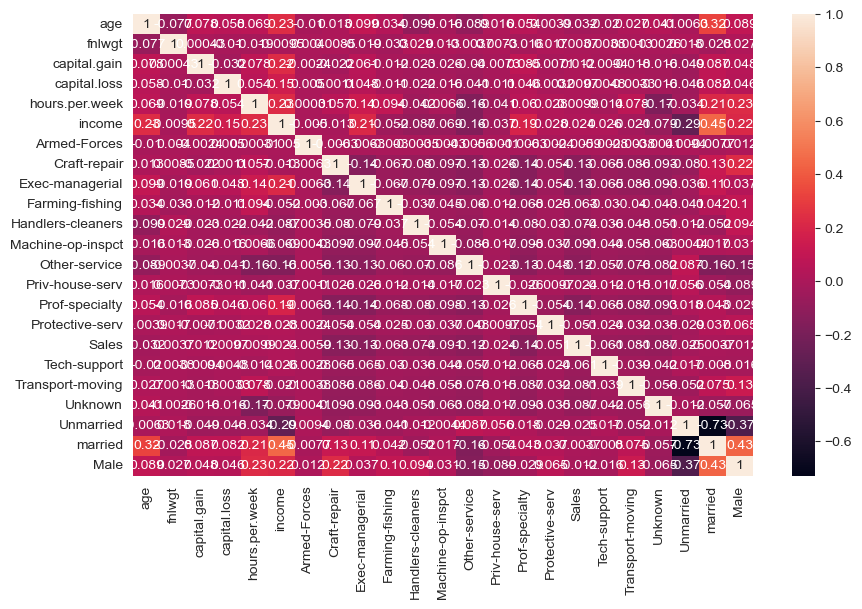

In [182]:
sns.heatmap(df.corr(), annot=True)

In [183]:
#sns.pairplot(df, hue = "income");

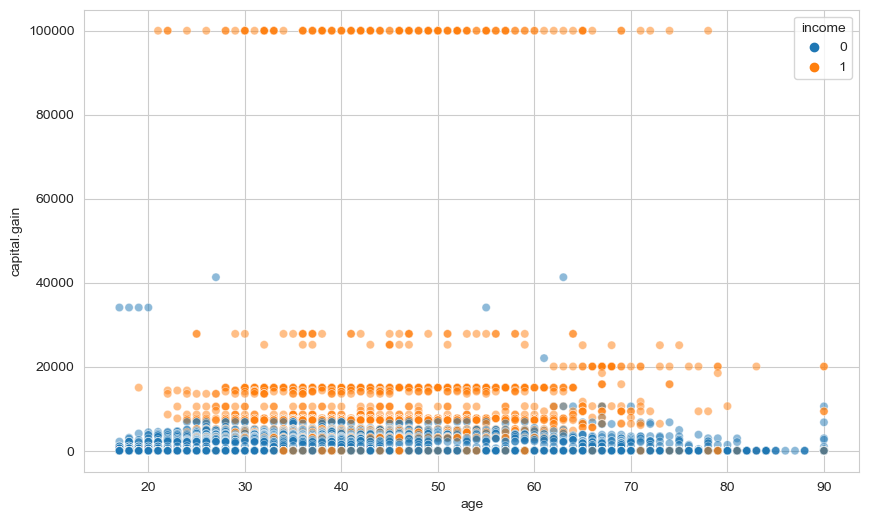

In [184]:
sns.scatterplot(x= "age", y = "capital.gain", data = df, hue = "income", alpha = 0.5);

### Feature Engineering

In [185]:
df.corr()[(df.corr()>= 0.9) & (df.corr() < 1)].any().any()# multicollinearity varlığı

False

In [186]:
corr_by_Class = df.corr()["income"].sort_values()[:-1]
corr_by_Class # datamızdaki tüm featurların target ile olan corr.larına bakıyoruz

Unmarried           -0.29
Other-service       -0.16
Handlers-cleaners   -0.09
Unknown             -0.08
Machine-op-inspct   -0.07
Farming-fishing     -0.05
Priv-house-serv     -0.04
Transport-moving    -0.02
Craft-repair        -0.01
fnlwgt              -0.01
Armed-Forces        -0.01
Sales                0.02
Tech-support         0.03
Protective-serv      0.03
capital.loss         0.15
Prof-specialty       0.19
Exec-managerial      0.21
Male                 0.22
capital.gain         0.22
hours.per.week       0.23
age                  0.23
married              0.45
Name: income, dtype: float64

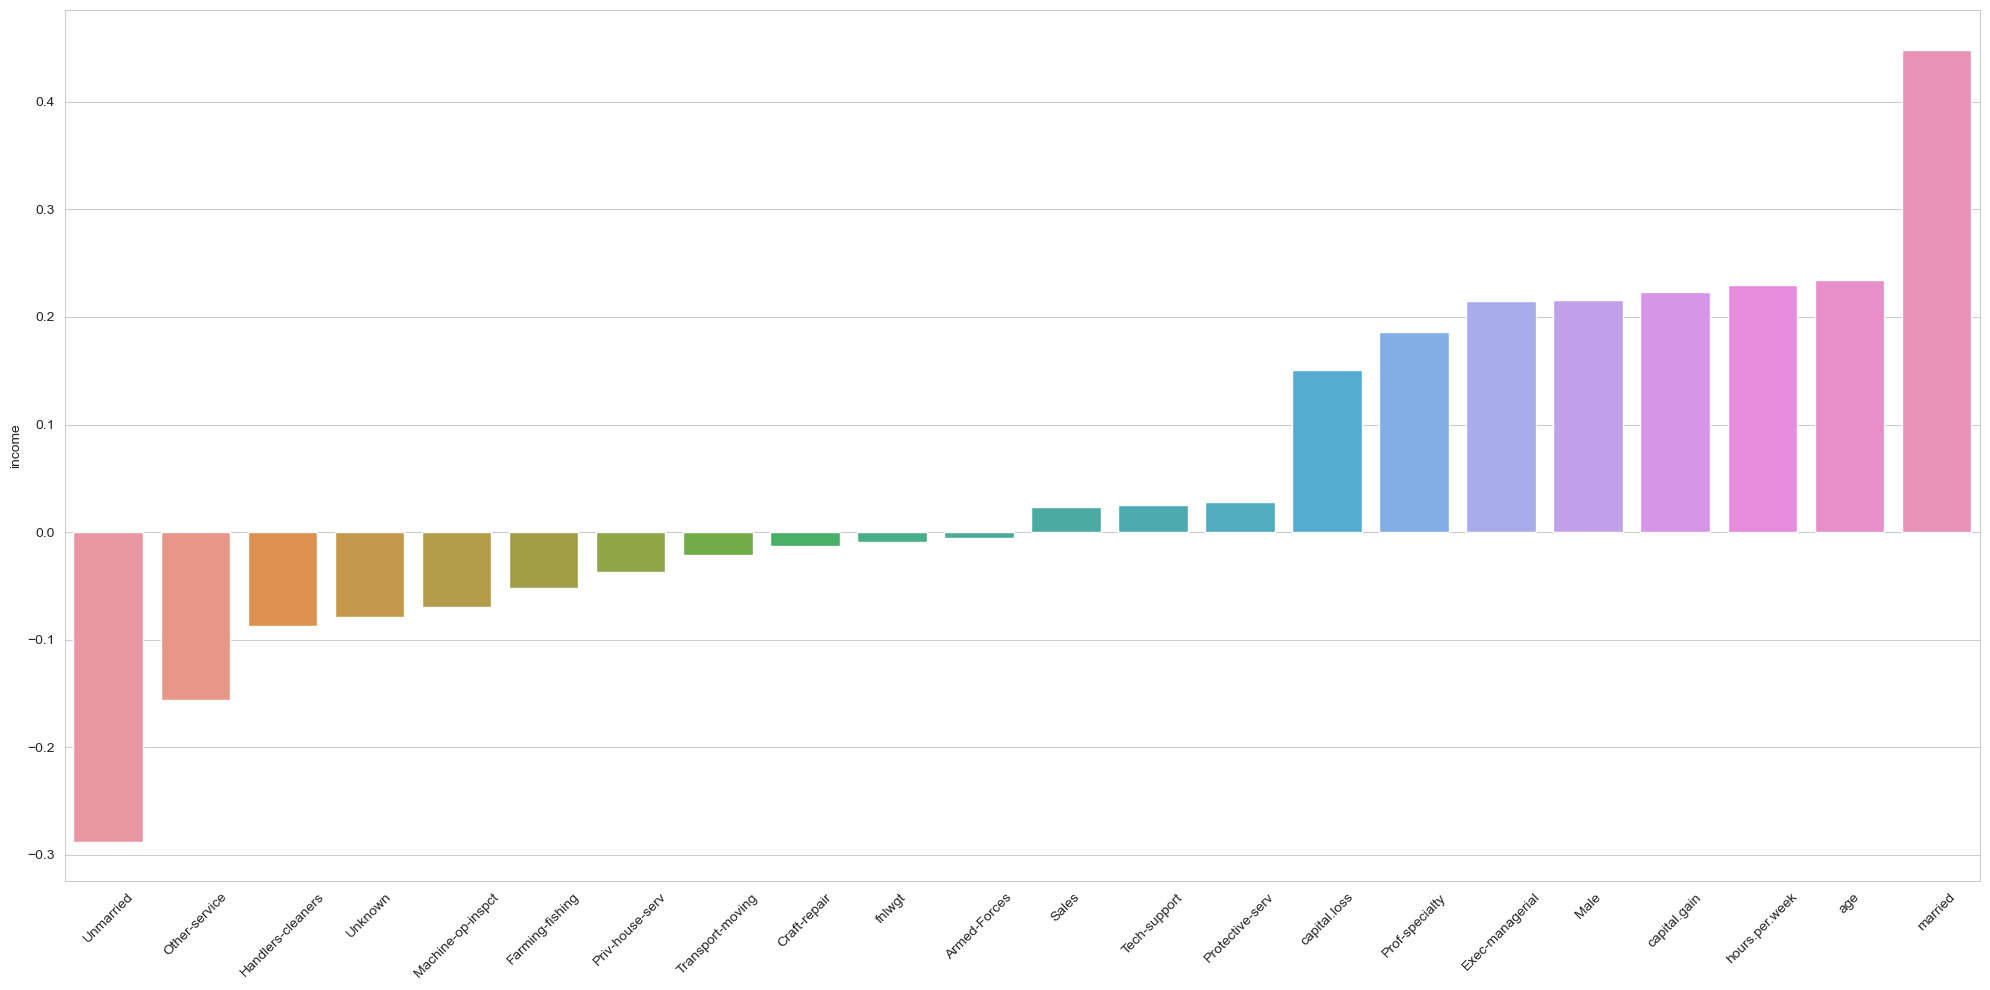

In [187]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_Class.index, y = corr_by_Class)
plt.xticks(rotation=45)
plt.tight_layout();

## Train | Test Split and Scaling

In [188]:
X = df.drop("income", axis = 1)
y = df["income"]

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
from sklearn.pipeline import Pipeline

# Logistic Regression

In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
from sklearn.neighbors import KNeighborsClassifier


In [195]:
pipe_model = Pipeline(steps=steps)

In [196]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('SVC',
   SVC(C=0.05, class_weight='balanced', gamma=0.3, probability=True,
       random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'SVC': SVC(C=0.05, class_weight='balanced', gamma=0.3, probability=True,
     random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'SVC__C': 0.05,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': 'balanced',
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 0.3,
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': True,
 'SVC__random_state': 42,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [197]:
steps = [("scaler", StandardScaler()), ("logistic", LogisticRegression())] # enson model yer almalı


In [198]:
pipe_model = Pipeline(steps=steps)



In [199]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [200]:
y_pred = pipe_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

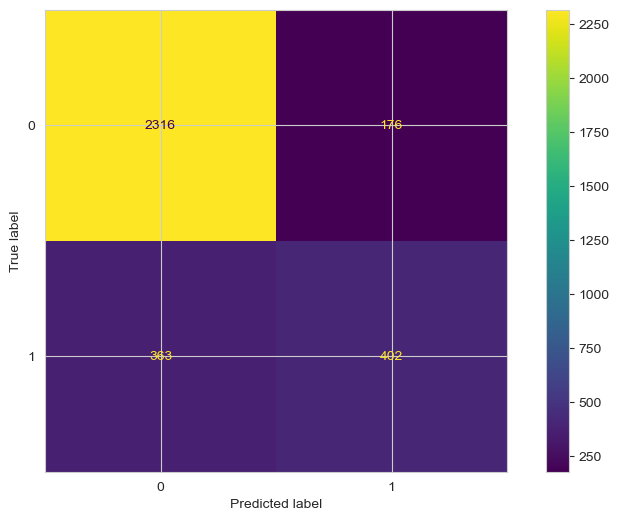

In [201]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2492
           1       0.70      0.53      0.60       765

    accuracy                           0.83      3257
   macro avg       0.78      0.73      0.75      3257
weighted avg       0.82      0.83      0.83      3257



## GridSearch on Pipeline Logistic Regresyon

In [203]:
steps = [("scaler", StandardScaler()), ("logistic", LogisticRegression())] 


In [204]:
#param_grid = {"knn__n_neighbors": range(1, 30), "knn__p":[1,2], "knn__weights":["uniform", "distance"]}
#pipe_model = Pipeline(steps = steps)

In [205]:
#penalty = ["l2", "l1"]
#C = np.logspace(-1, 5, 10) #katsayı için logspace alınarak değerler verilmesi öneriliyor
#class_weight = ["balanced", None]
#solver = ["lbfgs", "liblinear", "sag", "saga"]

In [206]:
np.logspace(-1, 5, 10)

array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05])

In [207]:
params={'model__C':[.01,.05,.1,.5,1,5,10],
           'model__penalty':['l1','l2']}
pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=40,ngram_range=(1,4))),
    ('tfidf', TfidfTransformer()),
    ('model',LogisticRegression())])
grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=params ,scoring='roc_auc')
grid.fit(train['text'], train['output'])
grid.score(test['text'], test['output'])

NameError: name 'CountVectorizer' is not defined

In [208]:



param_grid = {"penalty" : ["l2", "l1"],
             "C": [1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05],
             "class_weight": ["balanced", None],
             "solver": ["lbfgs", "liblinear", "sag", "saga"]}

In [209]:
params={'model__C':[.01,.05,.1,.5,1,5,10],
           'model__penalty':['l1','l2']}

In [210]:
pipe_model = Pipeline(steps = steps)

In [211]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Veri ölçeklendirme
    ('clf', LogisticRegression())  # Lojistik regresyon
])

# GridSearchCV için parametreler
parameters = {
    'clf__penalty': ['l1', 'l2'],  # Ceza türü
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Düzeltme parametresi
    'clf__solver': ["lbfgs", "liblinear", "sag", "saga"] ,
    'clf__class_weight': [None, 'balanced'] 
}

# GridSearchCV oluşturma
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)

In [212]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'clf__class_weight': [None, 'balanced'],
                         'clf__penalty': ['l1', 'l2'],
                         'clf__solver': ['lbfgs', 'liblinear', 'sag', 'saga']})

In [213]:
grid_search.best_params_

{'clf__C': 0.1,
 'clf__class_weight': None,
 'clf__penalty': 'l1',
 'clf__solver': 'saga'}

In [214]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[2316  176]
 [ 363  402]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2492
           1       0.70      0.53      0.60       765

    accuracy                           0.83      3257
   macro avg       0.78      0.73      0.75      3257
weighted avg       0.82      0.83      0.83      3257


Train_Set
[[20514  1714]
 [ 2913  4163]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     22228
           1       0.71      0.59      0.64      7076

    accuracy                           0.84     29304
   macro avg       0.79      0.76      0.77     29304
weighted avg       0.84      0.84      0.84     29304



# K-Nearest Neighbors (KNN) Classification

In [215]:
from sklearn.neighbors import KNeighborsClassifier

In [216]:
steps = [("Scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

In [217]:
Pipeline(steps = steps)

Pipeline(steps=[('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [218]:
pipe_model = Pipeline(steps=steps)

In [219]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [220]:
y_pred = pipe_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

## Model Performance

In [221]:
from sklearn.metrics import precision_recall_curve, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score

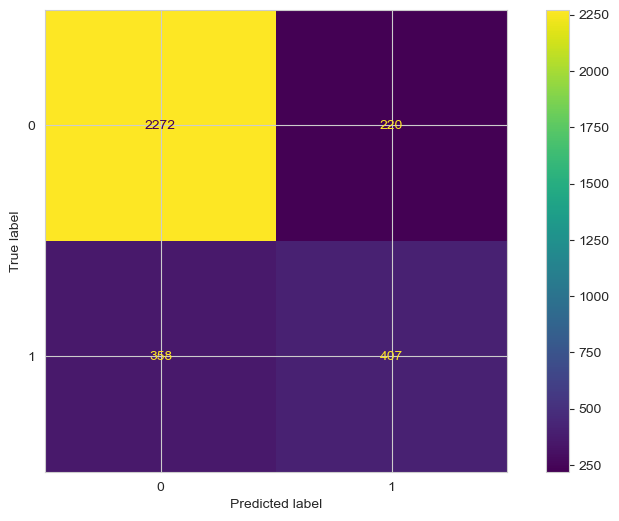

In [222]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [223]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_validate

In [224]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      2492
           1       0.65      0.53      0.58       765

    accuracy                           0.82      3257
   macro avg       0.76      0.72      0.74      3257
weighted avg       0.81      0.82      0.82      3257



In [225]:
pipe_model.get_params()

{'memory': None,
 'steps': [('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'Scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'Scaler__copy': True,
 'Scaler__with_mean': True,
 'Scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

## GridSearch on Pipeline

In [226]:
pipe_model.get_params()

{'memory': None,
 'steps': [('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'Scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'Scaler__copy': True,
 'Scaler__with_mean': True,
 'Scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [227]:
steps = [("Scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

In [228]:
param_grid = {"knn__n_neighbors": range(1, 30), "knn__p":[1,2], "knn__weights":["uniform", "distance"]}
pipe_model = Pipeline(steps = steps)

In [229]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv = 10, scoring = "f1")
pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1')

In [230]:
pipe_grid.best_params_

{'knn__n_neighbors': 19, 'knn__p': 2, 'knn__weights': 'uniform'}

In [231]:
pipe_grid.best_score_

0.6323418103743471

In [232]:
eval_metric(pipe_grid, X_train, y_train, X_test, y_test)

Test_Set
[[2320  172]
 [ 348  417]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2492
           1       0.71      0.55      0.62       765

    accuracy                           0.84      3257
   macro avg       0.79      0.74      0.76      3257
weighted avg       0.83      0.84      0.83      3257


Train_Set
[[20693  1535]
 [ 2813  4263]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     22228
           1       0.74      0.60      0.66      7076

    accuracy                           0.85     29304
   macro avg       0.81      0.77      0.78     29304
weighted avg       0.85      0.85      0.85     29304



In [233]:
steps = [("Scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=21))]
model = Pipeline(steps = steps)

scores = cross_validate(model, X_train, y_train, scoring = ["precision", "recall", "f1", "accuracy"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.70
test_recall      0.58
test_f1          0.63
test_accuracy    0.84
dtype: float64

# Support Vector Classifier

In [234]:
from sklearn.svm import SVC

In [235]:
pipe_model.get_params()

{'memory': None,
 'steps': [('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'Scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'Scaler__copy': True,
 'Scaler__with_mean': True,
 'Scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [236]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [237]:
param_grid = {"SVC__C": [0.001, 0.05, 0.01, 0.1],
             "SVC__gamma":["scale", "auto", 0.2, 0.3],
             "SVC__kernel":["rbf", "linear"]}

In [238]:
steps = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, class_weight="balanced", random_state = 42))] # enson model yer almalı
pipe_model = Pipeline(steps=steps)

svm_grid_model = GridSearchCV(pipe_model, param_grid, scoring ="recall", cv=10)

In [ ]:
svm_grid_model.fit(X_train, y_train)

In [ ]:
svm_grid_model.best_params_

In [ ]:
svm_grid_model.best_index_

In [ ]:
svm_grid_model.best_score_

In [ ]:
eval_metric(svm_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
steps = [("scaler", StandardScaler()), ("SVC", SVC(C = 0.05, gamma = 0.3, kernel = "rbf", 
                                                   probability=True, class_weight = "balanced", random_state = 42))]
model = Pipeline(steps=steps)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]